In [1]:

import os
import inspect
import sys
sys.path.insert(0, "../")


from experiment_information import *
from data import *
from helpers import *
from _version import __version__
import seaborn as sns
import matplotlib.pyplot as plt



import pandas as pd
import numpy as np
import logging
import pprint
import re
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
# mpl.rcParams['lines.linewidth'] = 1
# mpl.rcParams['legend.fontsize'] = 13

# mpl.rcParams['axes.titlesize'] = 15
# mpl.rcParams['axes.labelsize'] = 13
# mpl.rcParams['xtick.labelsize'] = 10
# mpl.rcParams['ytick.labelsize'] = 10


# Figure saving

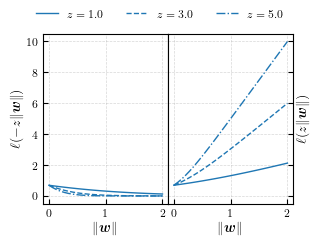

<Figure size 640x480 with 0 Axes>

In [7]:

IMG_DIRECTORY = "./Assets/expansion"
if not os.path.exists(IMG_DIRECTORY):
    os.makedirs(IMG_DIRECTORY)


def save_plot(fig, name, formats=["pdf","jpg"], date=False):
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    for f in formats:        
        path = "{}".format(name) + "_{}".format(current_date) + "." + f
        if not date:
            path = "{}".format(name) + "." + f
        fig.savefig(            
            os.path.join(IMG_DIRECTORY, path),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


width = 1.25 * 458.63788

plt.style.use("../latex_ready.mplstyle")

tuple_size = set_size(width, fraction=0.50)

multiplier = 0.9
second_multiplier = 0.7

fig, axs = plt.subplots(
    nrows=1,
    ncols=2,
    sharex=True,
    sharey=True,
    figsize=(multiplier * tuple_size[0], second_multiplier * multiplier * tuple_size[0]),
    gridspec_kw={"wspace": 0},
)

from matplotlib.pyplot import Line2D

# ICML adjustments
fig.subplots_adjust(left=0.2)
fig.subplots_adjust(bottom=0.2)
# fig.subplots_adjust(top=0.8)
# fig.subplots_adjust(right=0.8)


def loss(beta, z ):
    return np.log(1+np.exp(-beta*z))

betas = np.linspace(0,2,30)

zs = np.linspace(1,5,3)

linestyles = ["solid", "dashed", "dashdot", "dotted"]

for idx, z in enumerate(zs):



    axs[0].plot(betas, loss(betas,z),  color="C0", linestyle=linestyles[idx])
    # axs[0].plot(betas, class_preserving,  color="C3", linestyle=linestyles[idx])


    axs[1].plot(
        betas,
        loss(betas,-z),        
        linestyle=linestyles[idx],
        color="C0"
    )




# axs[0].set_xscale("log")
# axs[0].set_yscale("log")
axs[0].set_ylabel(r"$\ell(-z\norm{\boldsymbol{w}})$", labelpad=2.0)
axs[0].set_xlabel(r"$\norm{\boldsymbol{w}}$", labelpad=2.0)
axs[0].grid(which="both", axis="both", alpha=0.5)
axs[0].tick_params(axis='both', which='major', direction='in')
axs[0].tick_params(axis='both', which='minor', direction='in')
# axs[0].legend(title="State Evolution", loc="lower left")

# axs[1].set_xscale("log")
# axs[1].set_yscale("log")

axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].set_ylabel(r"$\ell(z\norm{\boldsymbol{w}})$", labelpad=2.0)
axs[1].set_xlabel(r"$\norm{\boldsymbol{w}}$", labelpad=2.0)
axs[1].grid(which="both", axis="both", alpha=0.5)
axs[1].tick_params(axis='both', which='major', direction='in')
axs[1].tick_params(axis='both', which='minor', direction='in')
# axs[1].legend(title="Perturbed", loc="lower left")



epsilon_legend = []

for idx, epsilon in enumerate(zs):
    epsilon_legend.append(Line2D([0],[0],color="C0", linestyle=linestyles[idx], label=r"$z={}$".format(zs[idx]))) 


fig.legend(handles=epsilon_legend, loc="upper center", ncol=4, handlelength=2)

save = True
if save:
    save_plot(
        fig,
        "expansion",
    )

plt.show()

plt.tight_layout()



